<a href="https://colab.research.google.com/github/aminghafari1/newscript/blob/main/lcaging_scan_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
import numpy as np


Mounted at /content/gdrive


In [7]:
import scipy.io as sio
runs=["run1","run2","run3","run4","run5"]
print(runs[0])

run1


In [8]:


run1=sio.loadmat('/content/gdrive/Shareddrives/LC-Aging/'\
'Older Adult - MRI Study/Data Collection/BAP/BAP data/'\
'sub-BAP103/ses-2/InsideScanner/'\
'subjectBAP103_Voddball_session2_'\
'%s'\
'_7_6_13_15.mat' %(runs[0]))



In [9]:
run1.keys

<function dict.keys>

<ipython-input-17-83616f24cd84>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  vectors = np.array(list(run1.values()))


In [18]:
isoddball=run1['isoddball']
iscorr=run1['iscorr']
trial_offset=run1['trial_offset']
nan_indices=np.where(np.isnan(iscorr)==True)
nan_indices=nan_indices[1]
iscorr_corrected=iscorr[~np.isnan(iscorr)]
trial_offset_corrected=trial_offset[~np.isnan(iscorr)]
isoddball_corrected=isoddball[~np.isnan(iscorr)]
print('The shape for the ofset_trial_corrected is:',np.shape(trial_offset_corrected))

The shape for the ofset_trial_corrected is: (29,)


In [19]:
print(iscorr_corrected)

[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 1.
 1. 1. 1. 1. 1.]


In [20]:
offsets_no_repeat_sorted=np.sort(np.unique(trial_offset))

In [21]:
print(np.size(iscorr_corrected))

29


In [22]:
accuracy=np.zeros((np.size(offsets_no_repeat_sorted)))
print(np.shape(accuracy))
for i in range(len(offsets_no_repeat_sorted)):
  corrects=0
  for j in range(len(iscorr_corrected)):
    if trial_offset_corrected[j]==offsets_no_repeat_sorted[i]:
      if iscorr_corrected[j]==1:
        corrects=corrects+1
  accuracy[i]=corrects/np.count_nonzero(trial_offset_corrected==offsets_no_repeat_sorted[i])

(5,)


In [23]:
accuracy

array([1.        , 0.66666667, 1.        , 0.83333333, 1.        ])

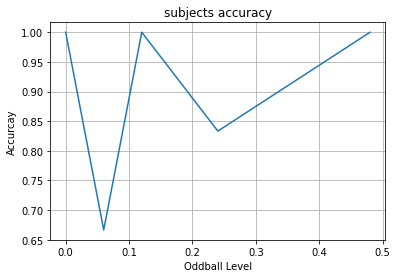

In [24]:
import matplotlib.pyplot as plt
plt.plot(offsets_no_repeat_sorted,accuracy)
plt.title('subjects accuracy')
plt.xlabel('Oddball Level')
plt.ylabel('Accurcay')
plt.grid(True)